In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_heart = pd.read_csv("/content/sample_data/heart.csv")

df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
display(df_heart.shape)

print("Unique values in column")
display(df_heart.nunique())

print("Null rows in column")
display(df_heart.isnull().sum())

print("Data type of each column element")
display(df_heart.dtypes)

(918, 12)

Unique values in column


,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


Null rows in column


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Data type of each column element


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


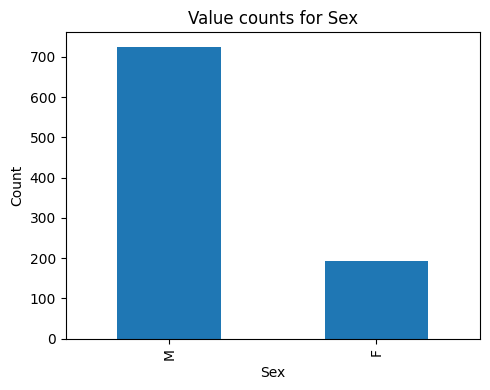

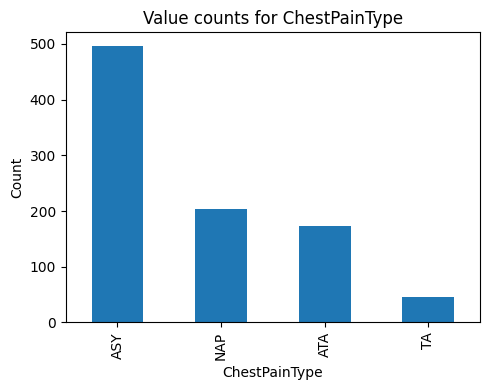

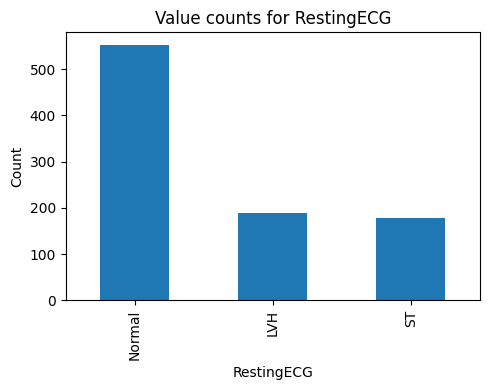

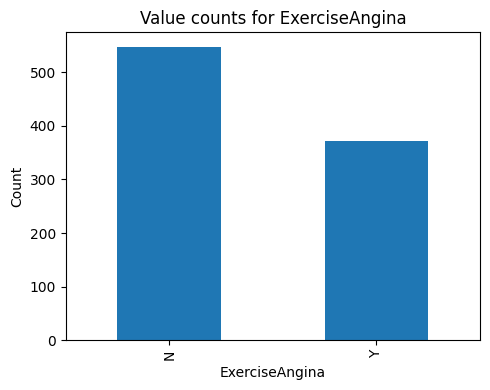

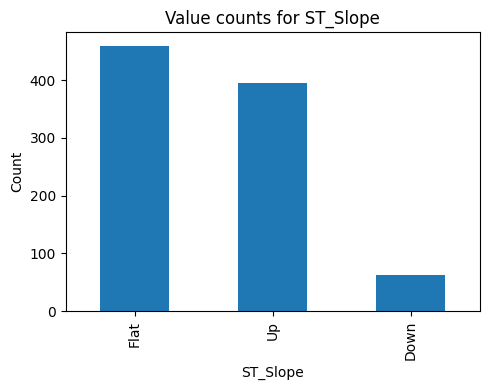

In [ ]:
#Categorical Feature Exploration
categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  df_heart[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

In [ ]:
# Label Encoding for binary categorical columns -> Sex and ExerciseAngina

le = LabelEncoder()
df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina']  = le.fit_transform(df_heart['ExerciseAngina'])

In [ ]:
df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,0.0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,0,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,1,1.5,Flat,1
9,48,0,ATA,120,284,0,Normal,120,0,0.0,Up,0


In [ ]:
# OneHot Encoding for nominal categorical columns
cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

df_heart_encoded = pd.get_dummies(
    df_heart,
    columns = cat_cols,
    dtype=int
)

In [ ]:
df_heart_encoded.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,1,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,0,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,1,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,1,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
# Normalization and Scalling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assume df_heart_encoded is our working dataframe with target 'HeartDisease'
target_col = "HeartDisease"

X = df_heart_encoded.drop(columns=[target_col])
y = df_heart_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

# Standard Scaling
scaler_sd = StandardScaler()
X_train_std = scaler_sd.fit_transform(X_train)#mean and SD will be calcualted from X_train
X_test_std = scaler_sd.transform(X_test)

# MinMax Scaling
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)

print("\nFirst 5 rows of X_train & X_test (Standard Scaled):")
display(X_train_std_df.head())
display(X_test_std_df.head())

# Convert scaled arrays back to DataFrame for better visualization with column names
X_train_mm_df = pd.DataFrame(X_train_mm, columns = X_train.columns, index = X_train.index)
X_test_mm_df = pd.DataFrame(X_test_mm, columns = X_test.columns, index = X_test.index)

print("\nFirst 5 rows of X_train (Minmax Scaled):")
display(X_train_mm_df.head())
display(X_test_mm_df.head())


First 5 rows of X_train & X_test (Standard Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.985202,-1.862131,0.373828,-0.061812,-0.532524,1.710544,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
30,-0.080384,0.537019,0.643819,2.946539,-0.532524,-0.247550,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
377,1.198319,0.537019,1.453793,-1.878000,1.877849,-0.567238,-0.845997,0.259340,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
535,0.239292,0.537019,-0.166155,-1.878000,-0.532524,-0.567238,1.182037,0.076994,0.905597,-0.480384,-0.530275,-0.213524,1.978455,-1.225487,-0.494088,-0.254981,0.962897,-0.851064
807,0.026175,0.537019,-1.354116,0.999959,-0.532524,0.791439,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999



First 5 rows of X_train (Minmax Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.0,0.700,0.323383,0.0,0.899225,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,1.0,0.725,0.859038,0.0,0.519380,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,1.0,0.800,0.000000,1.0,0.457364,0.0,0.431818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.562500,1.0,0.650,0.000000,0.0,0.457364,1.0,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.520833,1.0,0.540,0.512438,0.0,0.720930,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


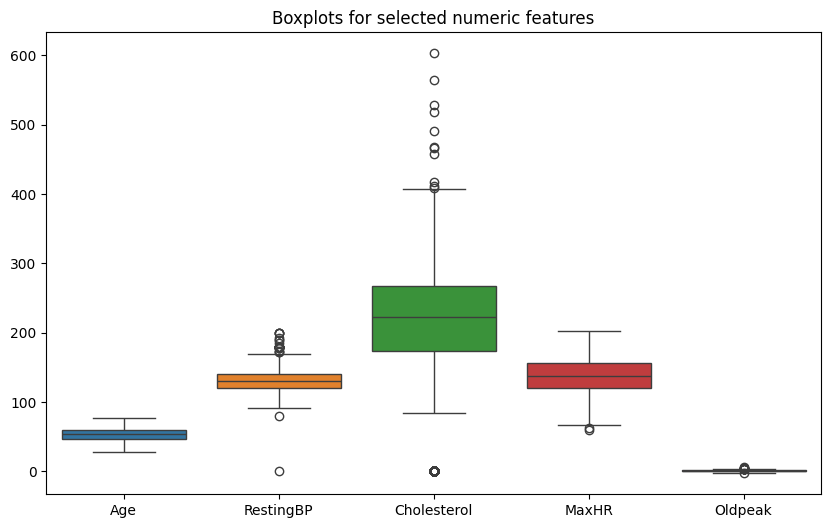

In [ ]:
# Box plot

numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_heart_encoded[numeric_cols])
plt.title("Boxplots for selected numeric features")
plt.show()

In [ ]:
# Use IQR method on Cholesterol as an example
col = "Cholesterol"
Q1 = df_heart_encoded[col].quantile(0.25)
Q3 = df_heart_encoded[col].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = df_heart_encoded[(df_heart_encoded[col]<lower) | (df_heart_encoded[col]>upper)]
print(f"Numer of detected outliers in {col}: ", len(outliers))

Numer of detected outliers in Cholesterol:  183


In [ ]:
# 1. Remove outliers
df_no_outliers = df_heart_encoded[(df_heart_encoded[col]>=lower) & (df_heart_encoded[col]<=upper)]
print(len(df_no_outliers))

# 2. Cap Outlier
df_capped = df_heart_encoded.copy()
df_capped[col] = df_capped[col].clip(lower, upper)
print(df_capped[col])

# 3. Log transform the column (for skewed distributions)
df_log = df_heart_encoded.copy()
df_log[col + '_log'] = np.log(df_log[col]+1)

print(df_log[col + '_log'])



735
0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64
0      5.669881
1      5.198497
2      5.648974
3      5.370638
4      5.278115
         ...   
913    5.579730
914    5.267858
915    4.882802
916    5.468060
917    5.170484
Name: Cholesterol_log, Length: 918, dtype: float64


In [ ]:
# Feature Transformation and Domain-Driven Features

from sklearn.preprocessing import PolynomialFeatures
# Polynomial features using Age and MaxHR (if available)

poly_cols = ['Age', 'MaxHR']
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(df_heart_encoded[poly_cols])
poly_features_name = poly.get_feature_names_out(poly_cols)

print(poly_features_name)
print(poly_features.shape)

['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']
(918, 5)


In [ ]:
# Binning Age into categories (Young, Middle, Old)
# makes the data more understandable
df_heart_encoded['Age_bin'] = pd.cut(
    df_heart_encoded['Age'], bins=[0,30,50,100],
    labels=['Young', 'Middle', 'Old']
)

print(df_heart_encoded[['Age', 'Age_bin']].head(40))

    Age Age_bin
0    40  Middle
1    49  Middle
2    37  Middle
3    48  Middle
4    54     Old
5    39  Middle
6    45  Middle
7    54     Old
8    37  Middle
9    48  Middle
10   37  Middle
11   58     Old
12   39  Middle
13   49  Middle
14   42  Middle
15   54     Old
16   38  Middle
17   43  Middle
18   60     Old
19   36  Middle
20   43  Middle
21   44  Middle
22   49  Middle
23   44  Middle
24   40  Middle
25   36  Middle
26   53     Old
27   52     Old
28   53     Old
29   51     Old
30   53     Old
31   56     Old
32   54     Old
33   41  Middle
34   43  Middle
35   32  Middle
36   65     Old
37   41  Middle
38   48  Middle
39   48  Middle


In [ ]:
# Domain-driven risk categories for RestingBP and Oldpeak

def bp_risk(bp):
  if bp<120:
    return "Normal";
  elif bp<140:
    return "Elevated";
  else:
    return "High";

def oldpeak_risk(op):
  if op==0:
    return "No Stress"
  elif op<2:
    return "Moderate Stress"
  else:
    return "High Stress"

df_heart_encoded["BP_Risk"]=df_heart_encoded["RestingBP"].apply(bp_risk)
df_heart_encoded["Oldpeak_Risk"]=df_heart_encoded["Oldpeak"].apply(oldpeak_risk)

df_heart_encoded[["RestingBP", "BP_Risk", "Oldpeak","Oldpeak_Risk"]]

,RestingBP,BP_Risk,Oldpeak,Oldpeak_Risk
0,140,High,0.0,No Stress
1,160,High,1.0,Moderate Stress
2,130,Elevated,0.0,No Stress
3,138,Elevated,1.5,Moderate Stress
4,150,High,0.0,No Stress
...,...,...,...,...
913,110,Normal,1.2,Moderate Stress
914,144,High,3.4,High Stress
915,130,Elevated,1.2,Moderate Stress
916,130,Elevated,0.0,No Stress


In [ ]:
# Putting It All Together in a Preprocessing Pipeline
# A pipeline in ML ensures preprocessing and modeling steps run in a fixed sequence without mixing training and test data.
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
cat_features = ["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"]

# Numeric pipeline
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# categorical pipeline
cat_pipeline = Pipeline([
    ("ohe", OneHotEncoder(drop='first'))
])

# combine both
preprocess = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Full pipeline with a simple model
clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000))
])

In [ ]:
# Appling the basic pipeline
# Train-test split using original df_heart (not already encoded)
x = df_heart.drop(columns=[target_col])
y = df_heart[target_col]

x_train_pipe, x_test_pipe, y_train_pipe, y_test_pipe = train_test_split(x,y, test_size = 0.25, random_state=42)

# Fit the full pipeline
clf.fit(x_train_pipe, y_train_pipe)

# Predict and evaluate
from sklearn.metrics import accuracy_score

y_pred_pipe = clf.predict(x_test_pipe)
acc=accuracy_score(y_test_pipe,y_pred_pipe)
print("Logistic Regression with preprocessing pipeline: ", acc)


Logistic Regression with preprocessing pipeline:  0.8434782608695652
